In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示负号

In [2]:
root_2 = 'train_2(sample)'
img_names = os.listdir(root_2)  
img_names = sorted(img_names,key = lambda name : int(name.split('-')[0])) # 按顺序读取图片

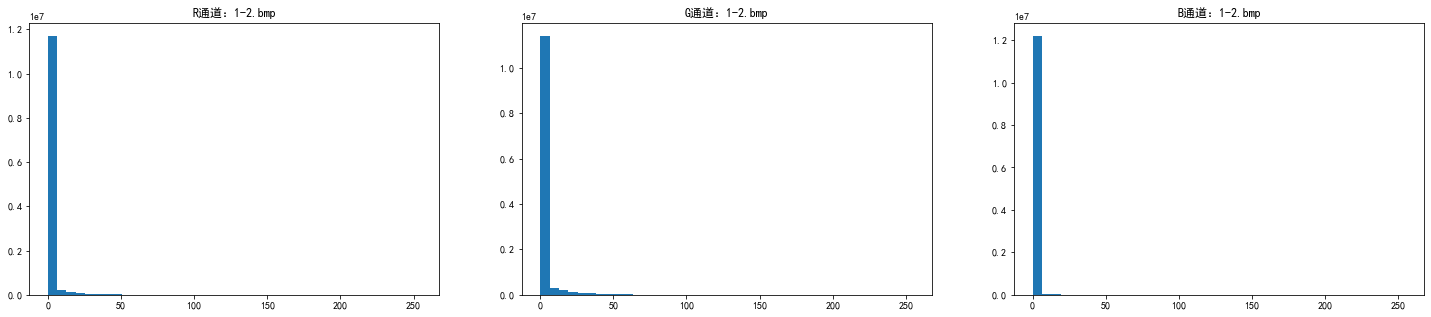

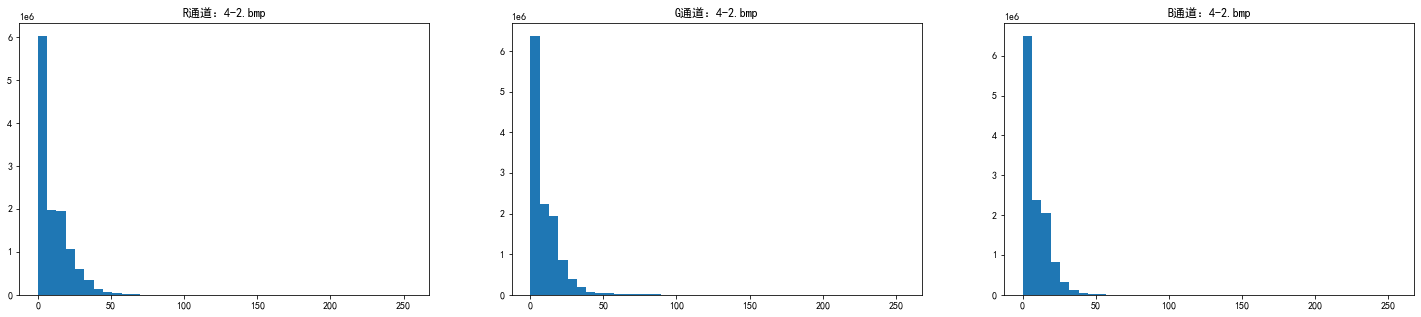

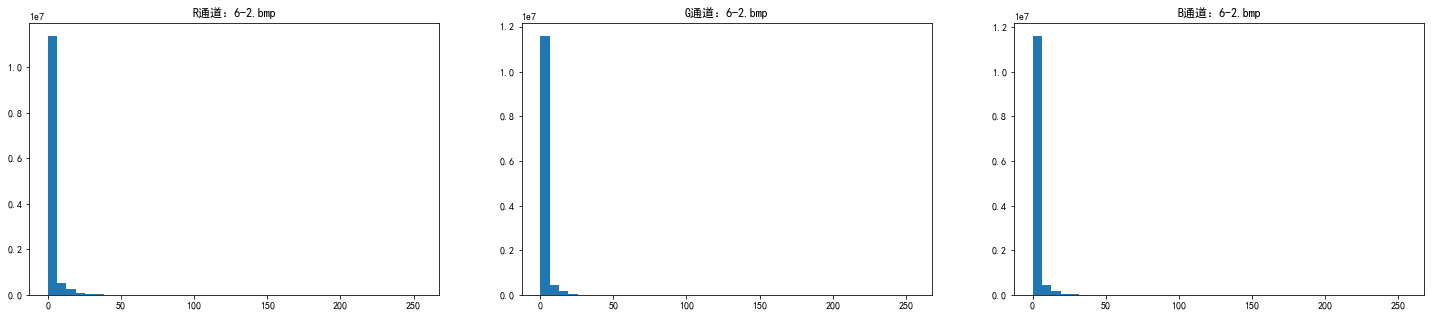

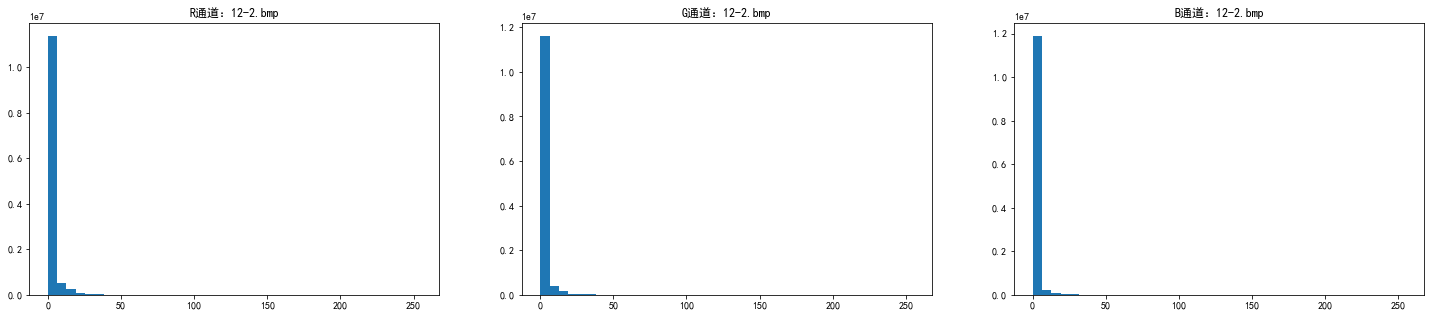

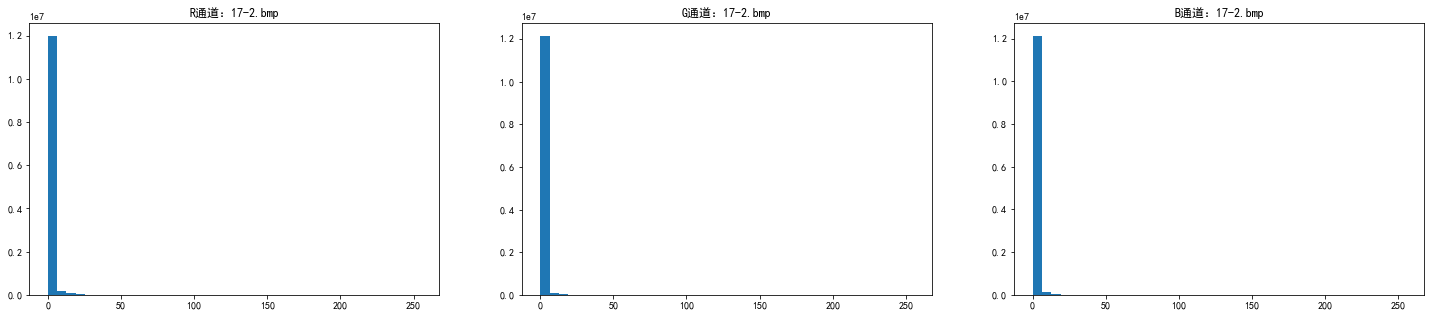

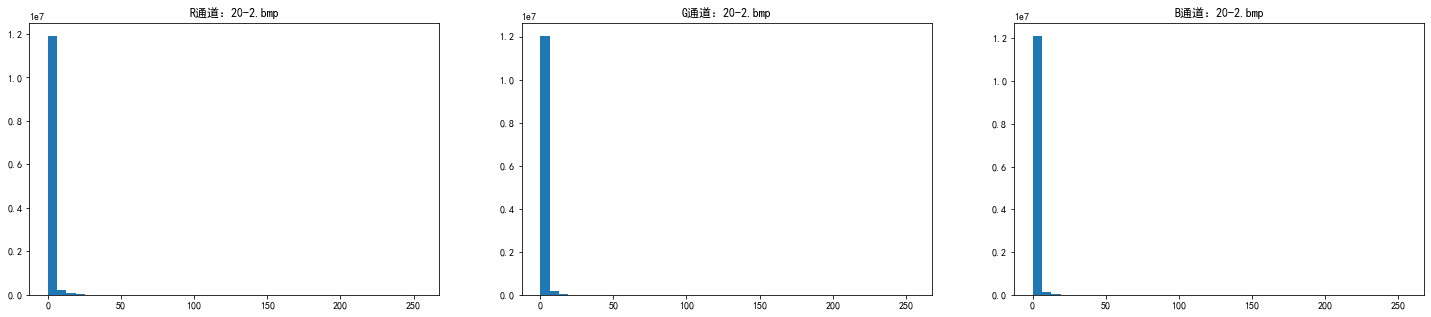

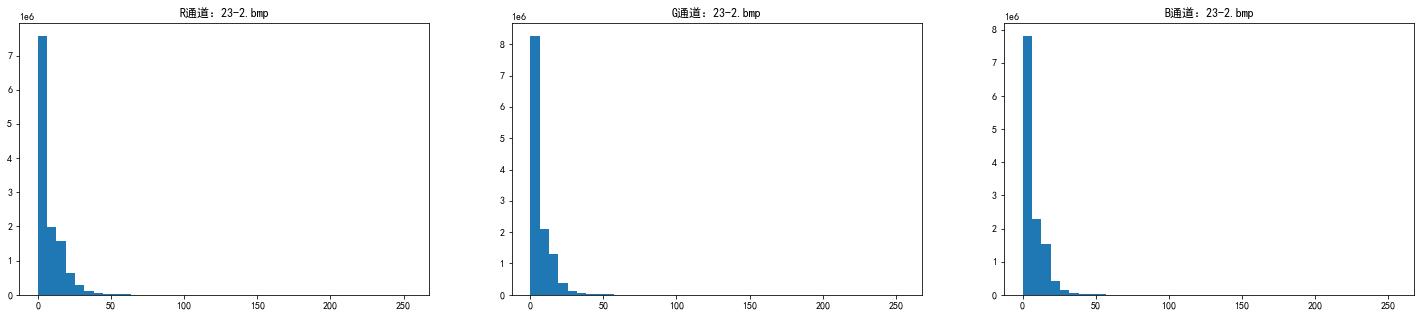

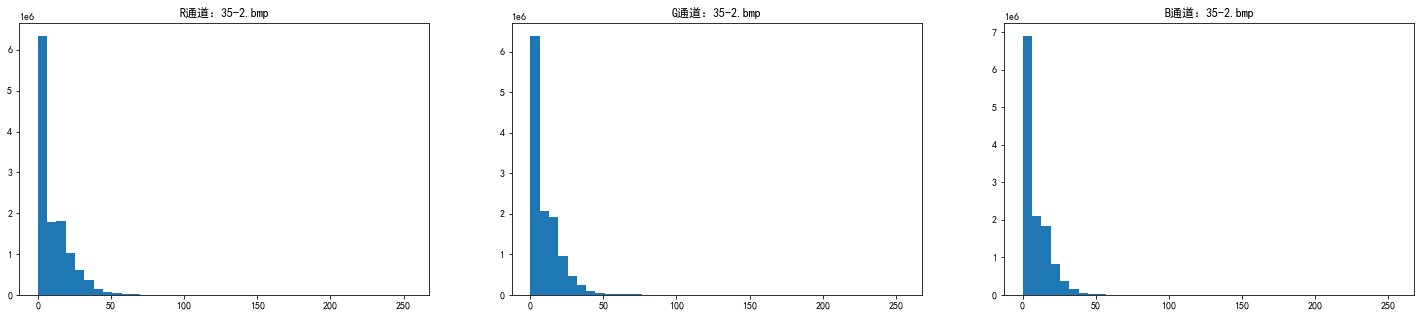

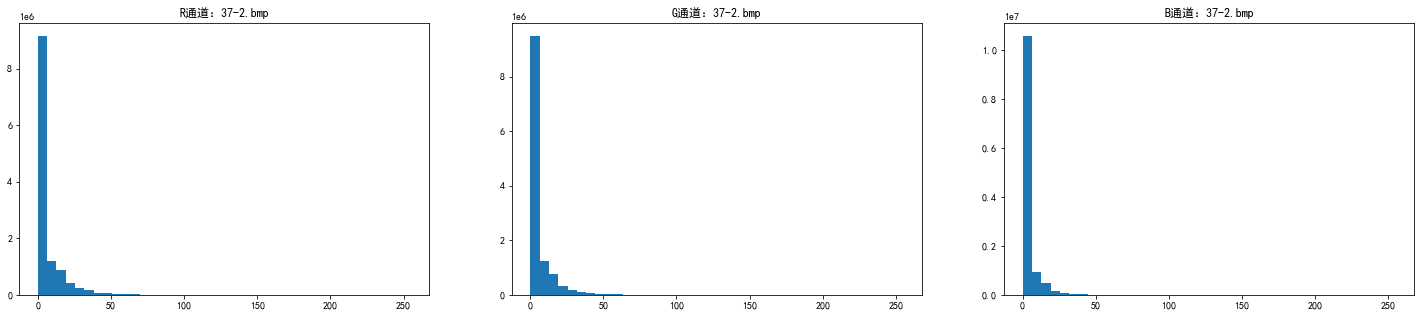

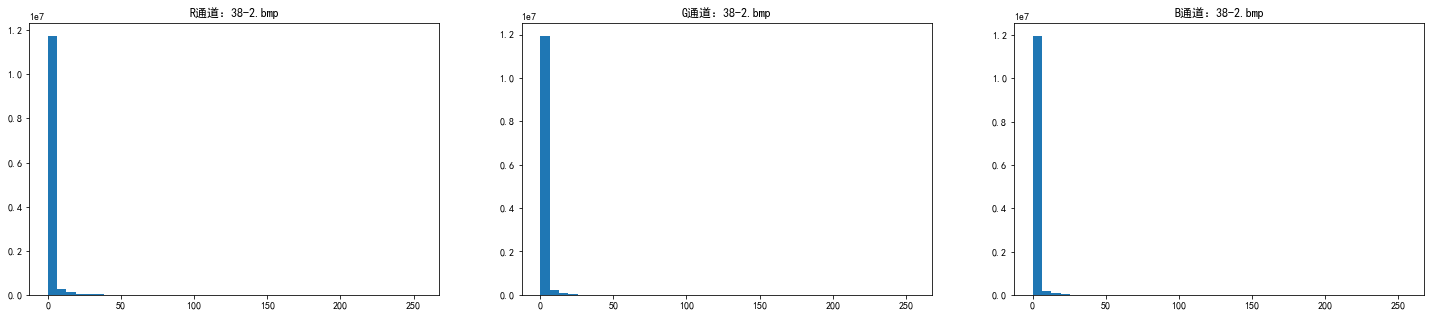

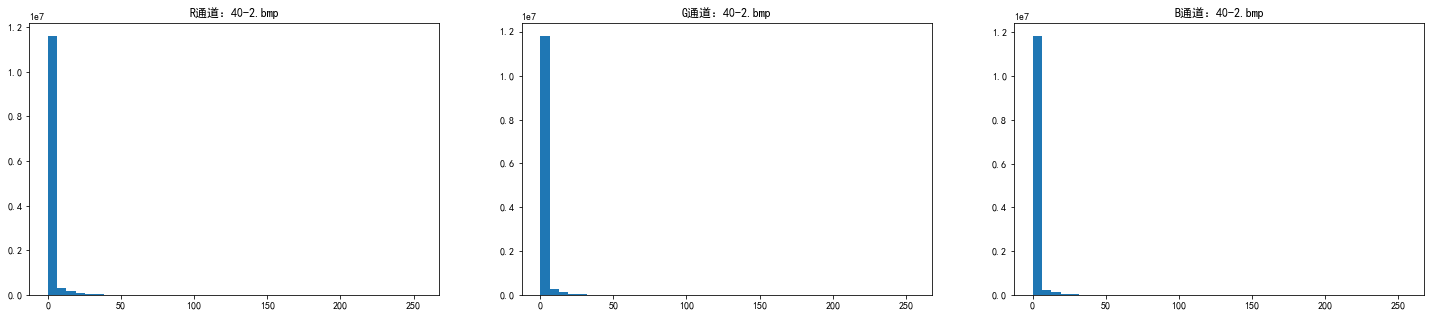

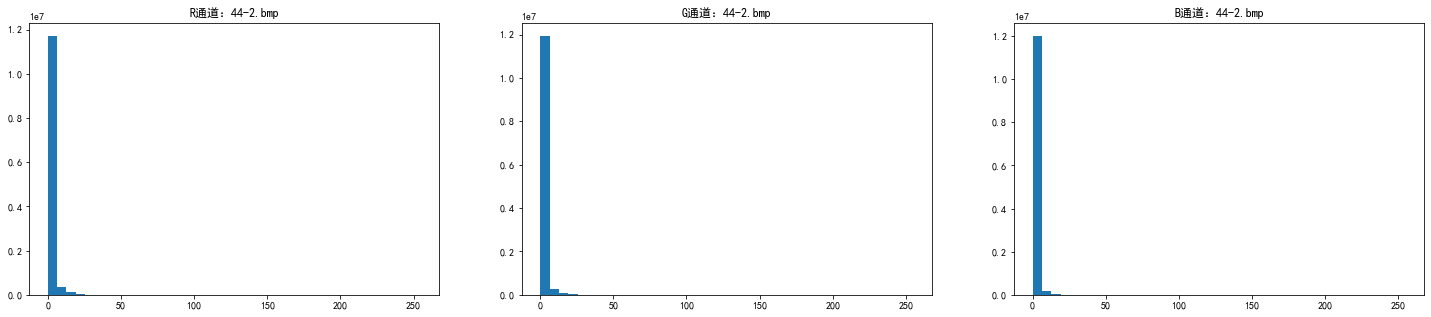

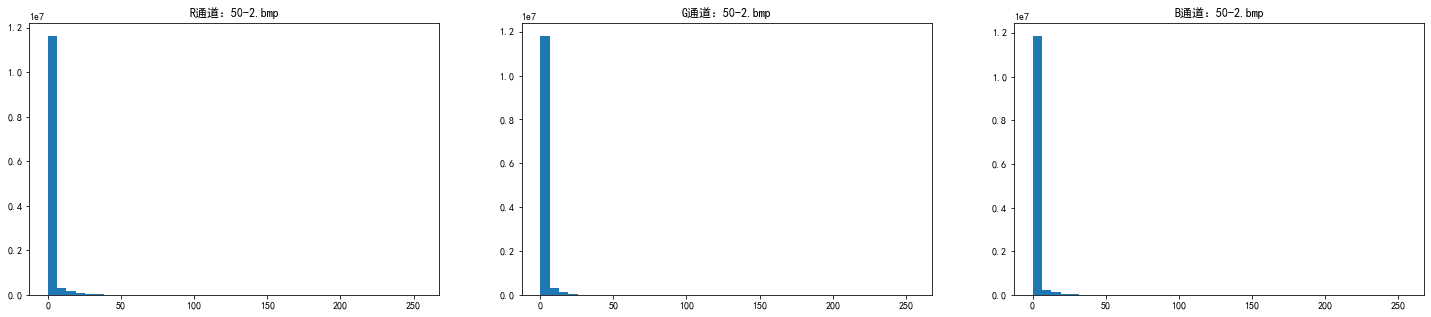

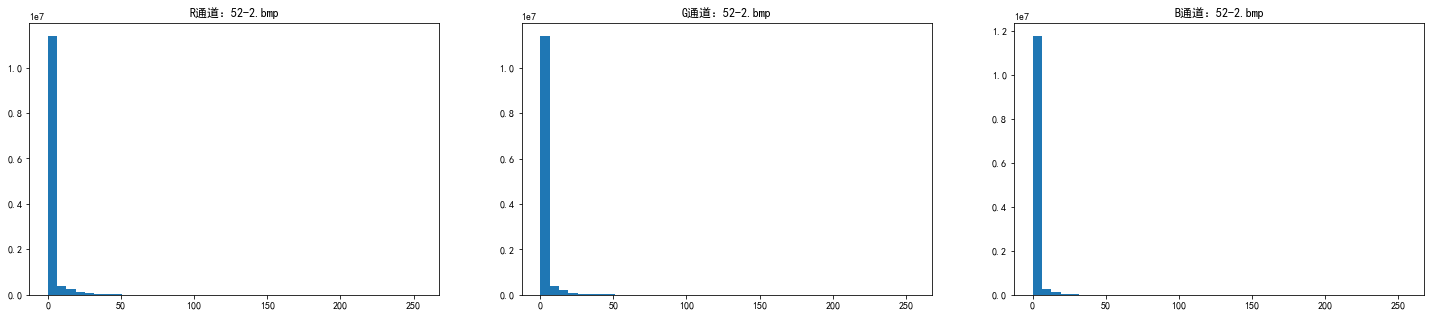

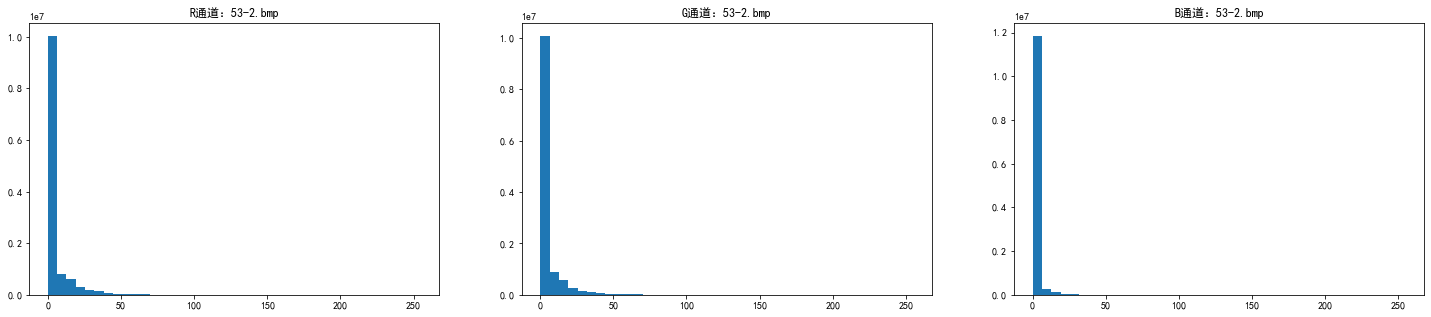

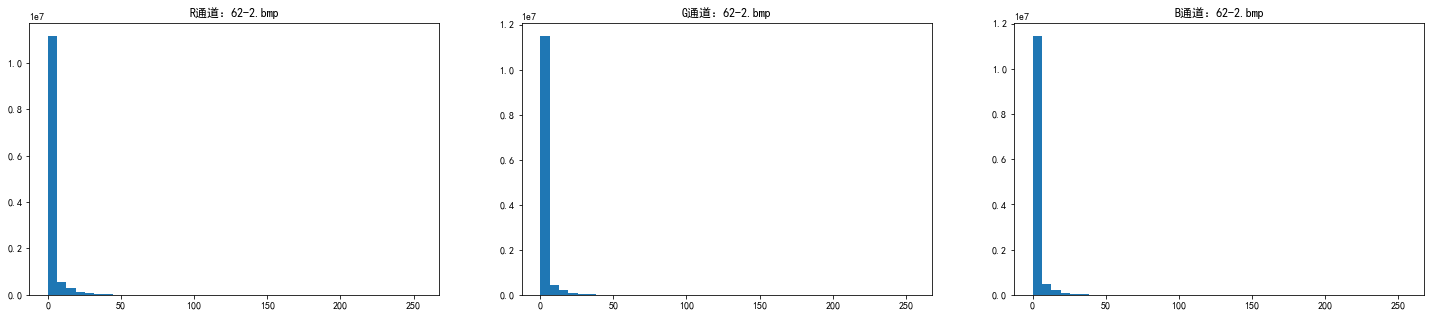

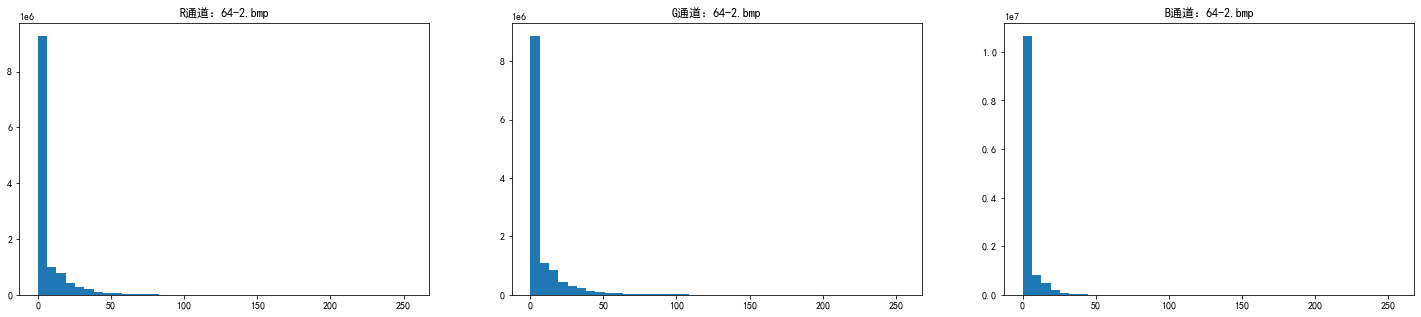

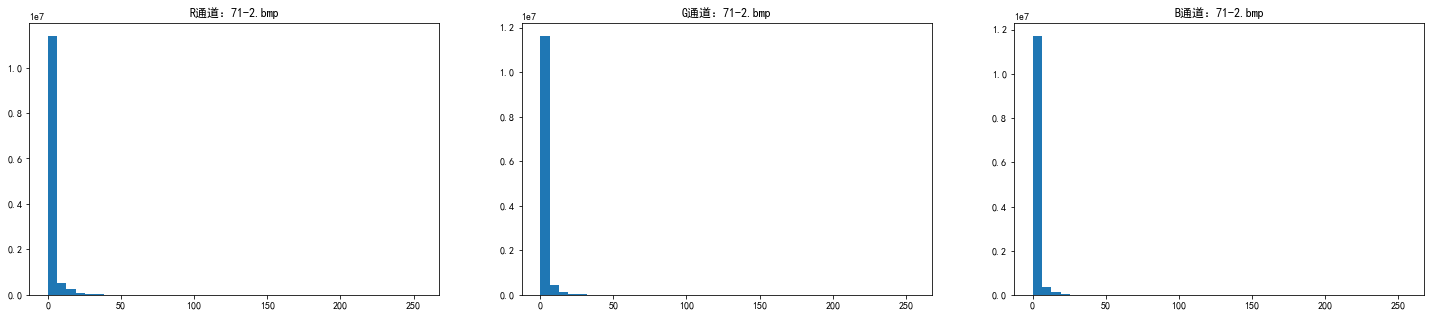

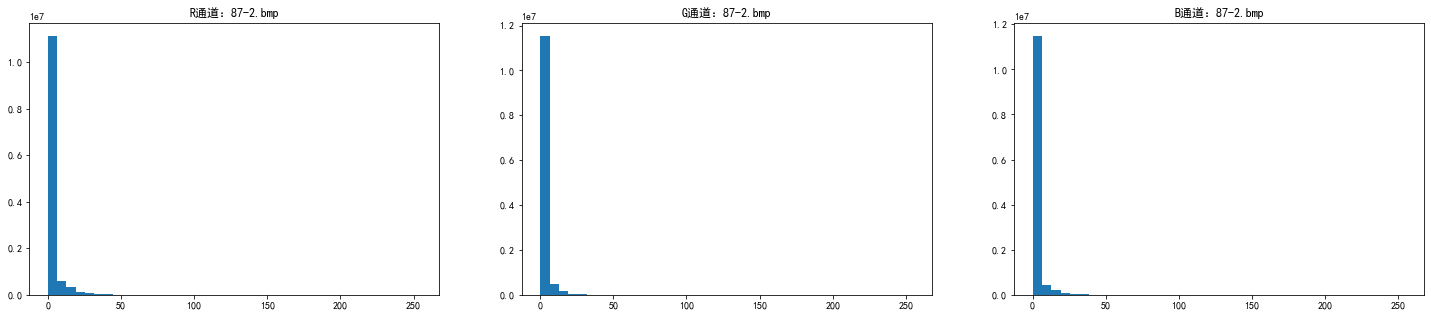

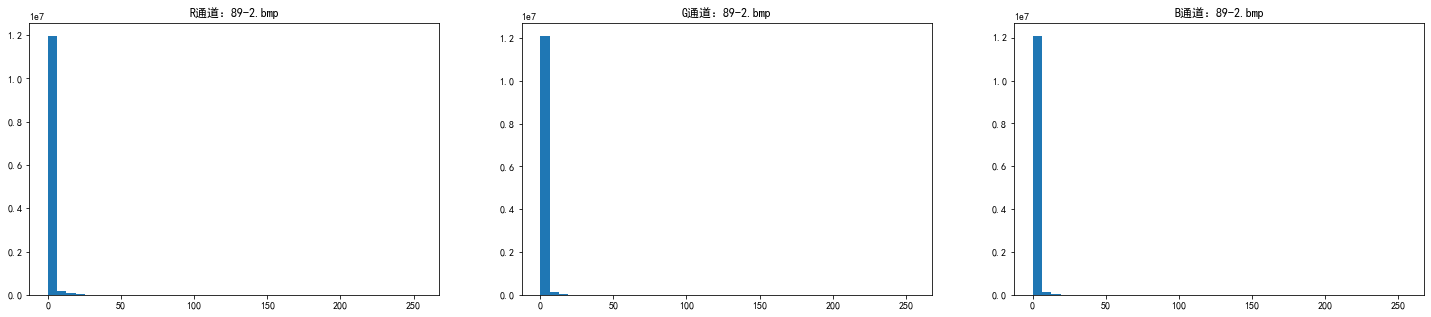

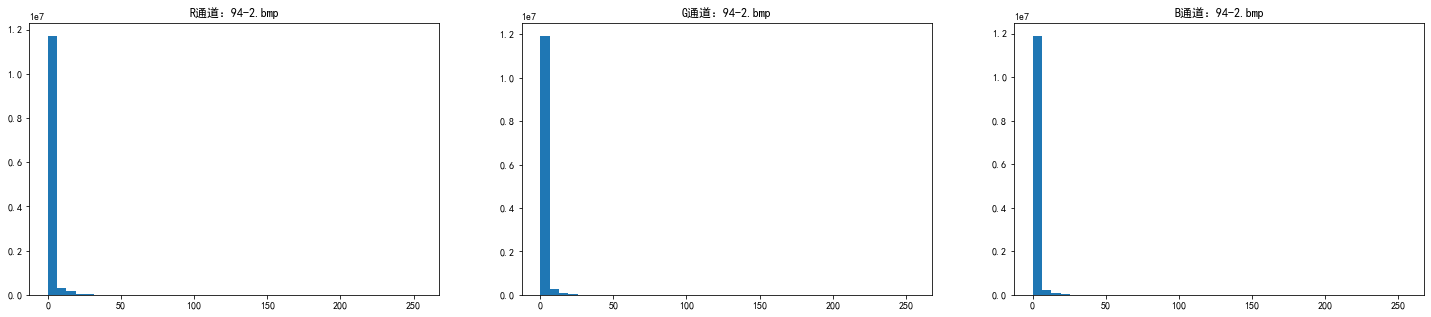

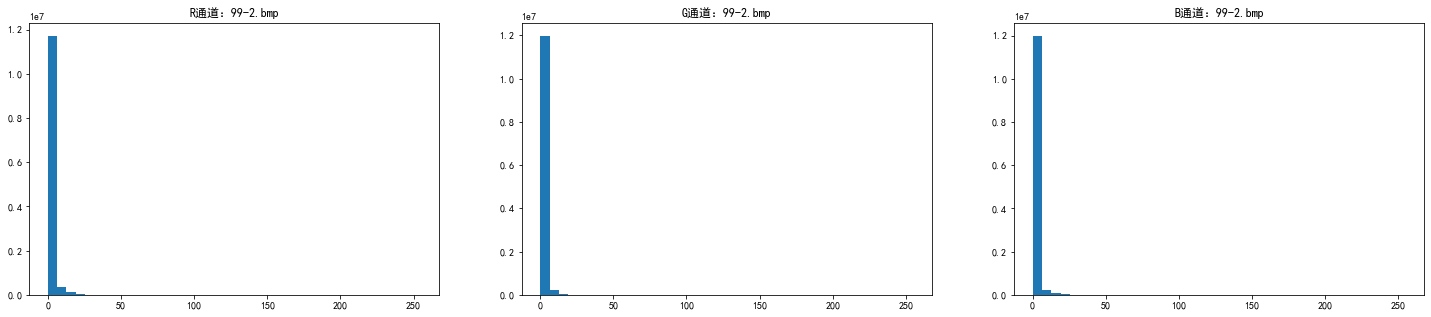

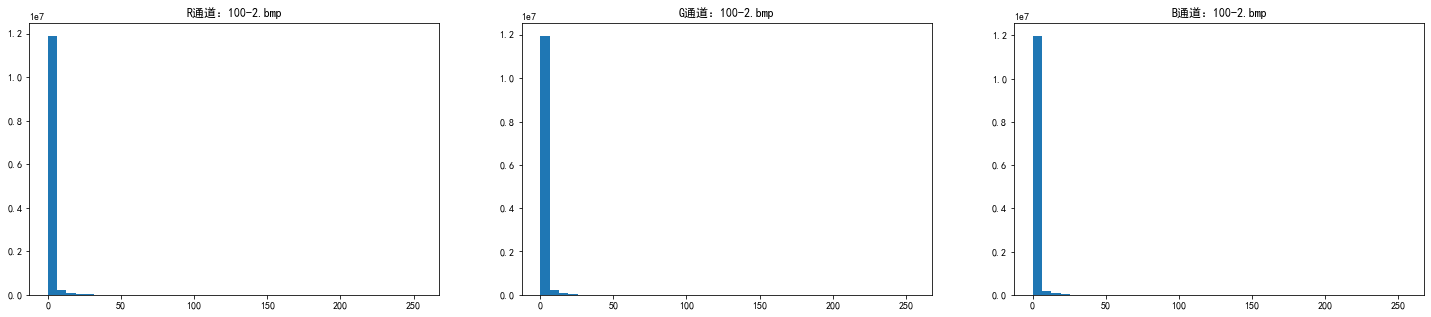

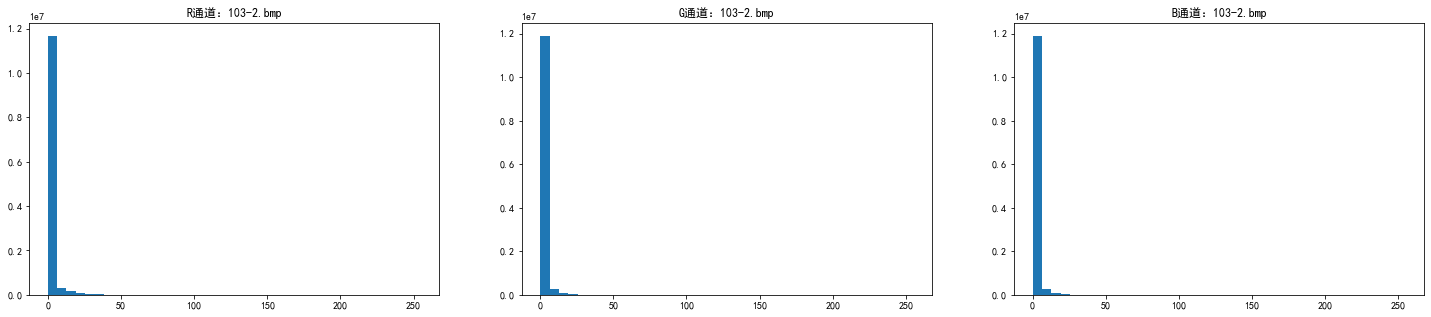

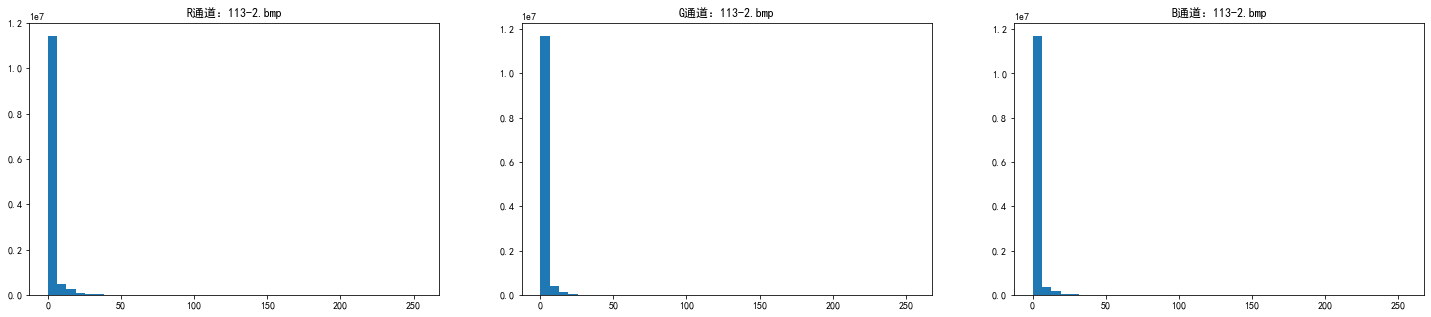

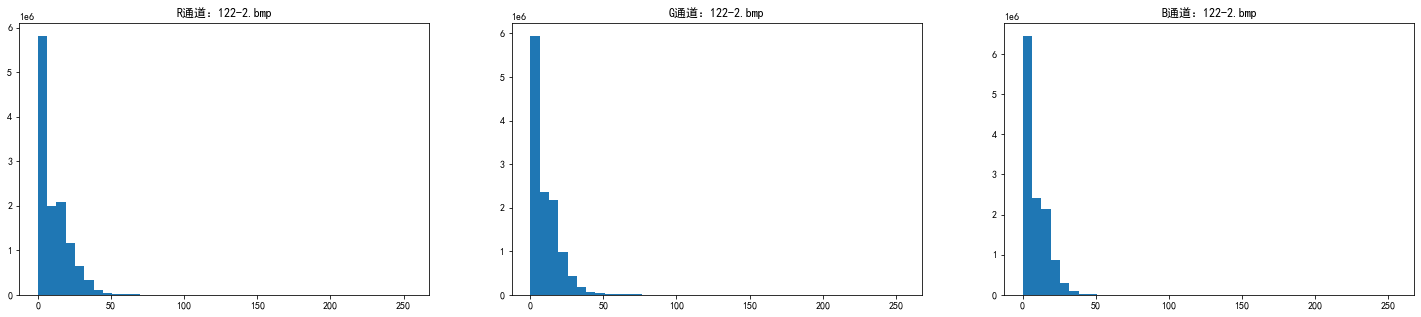

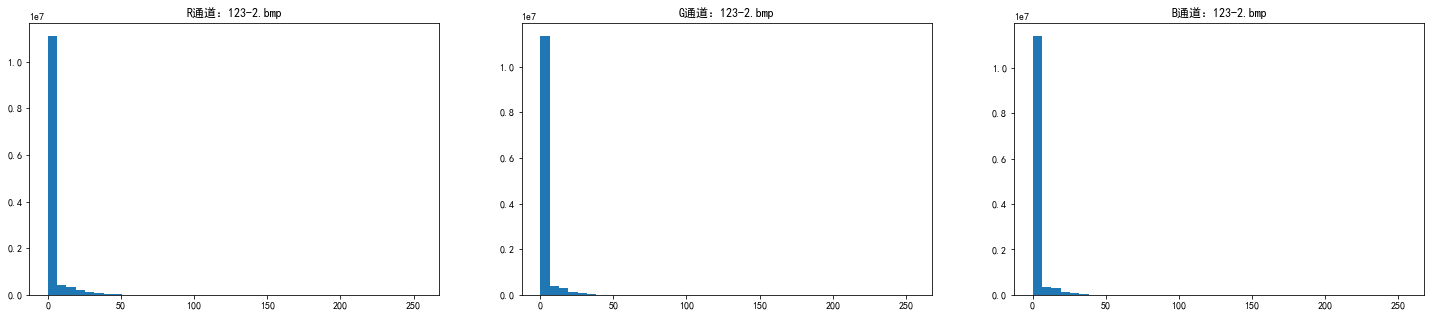

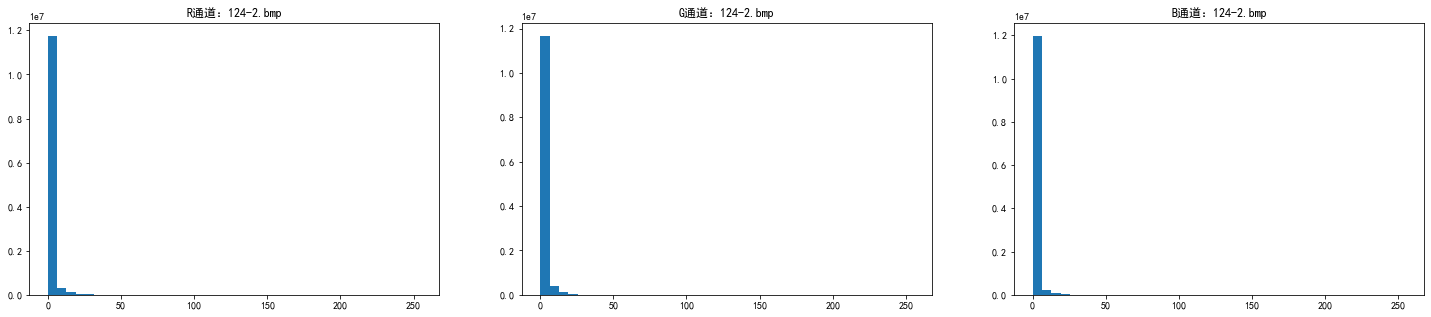

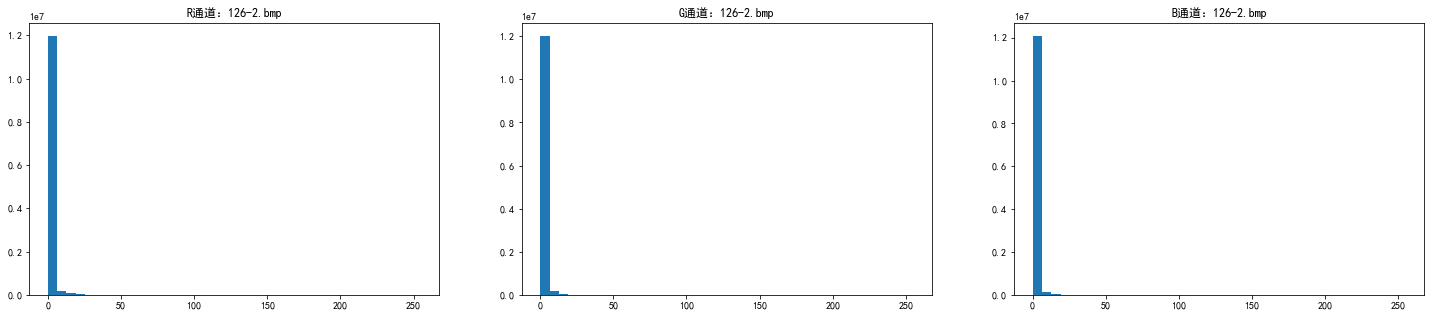

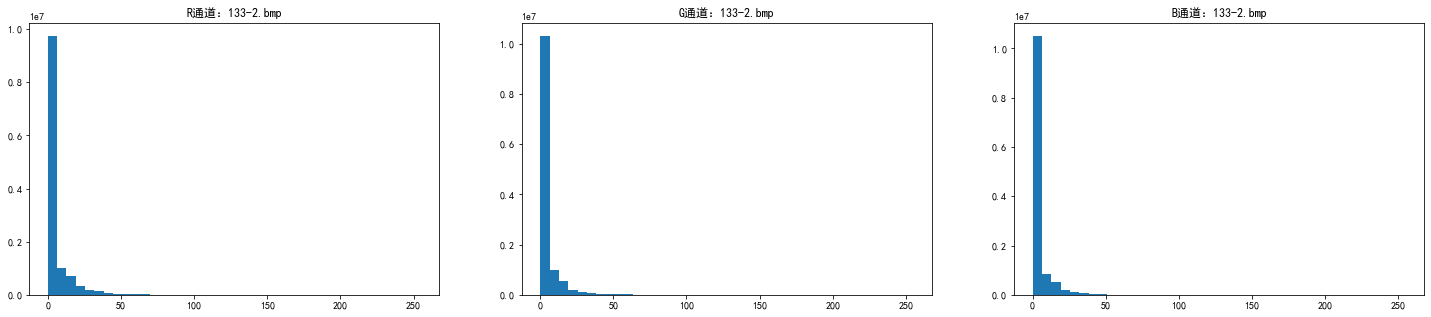

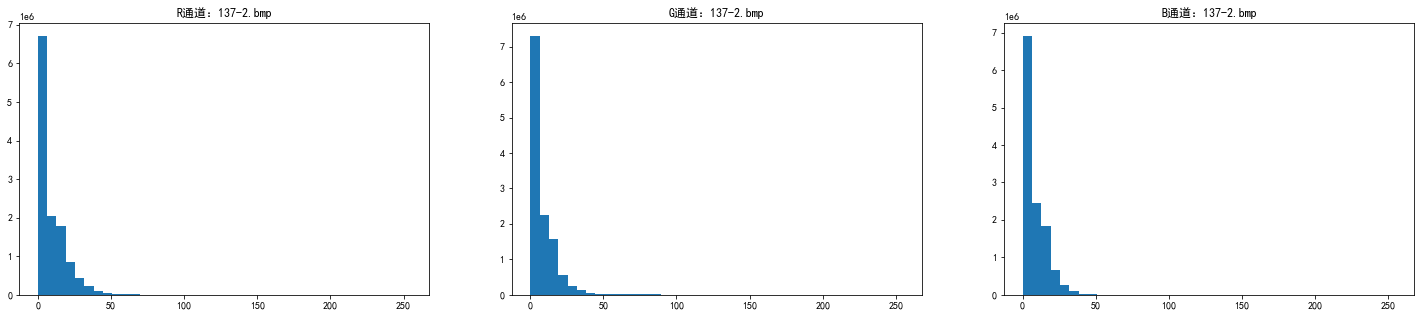

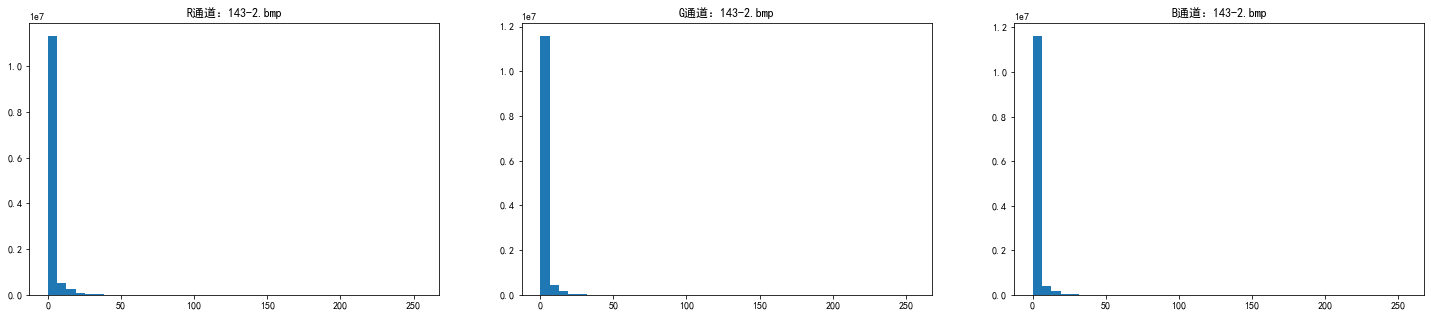

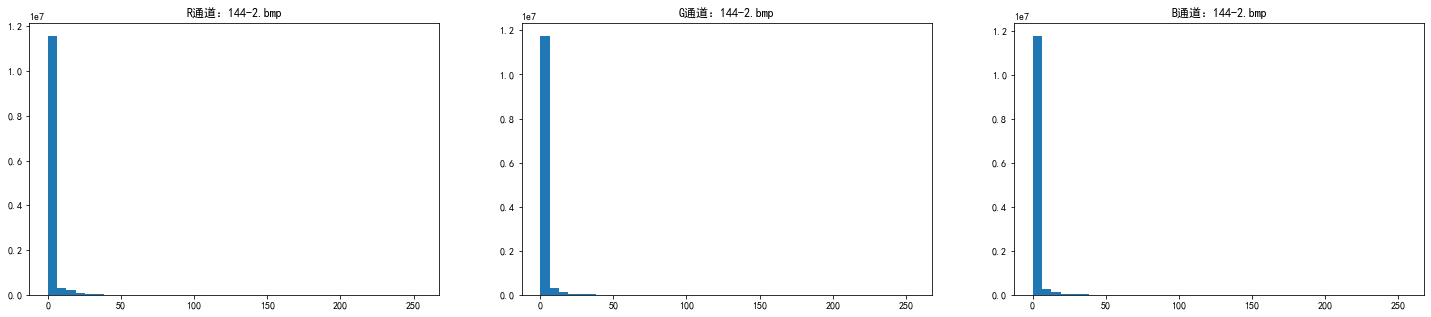

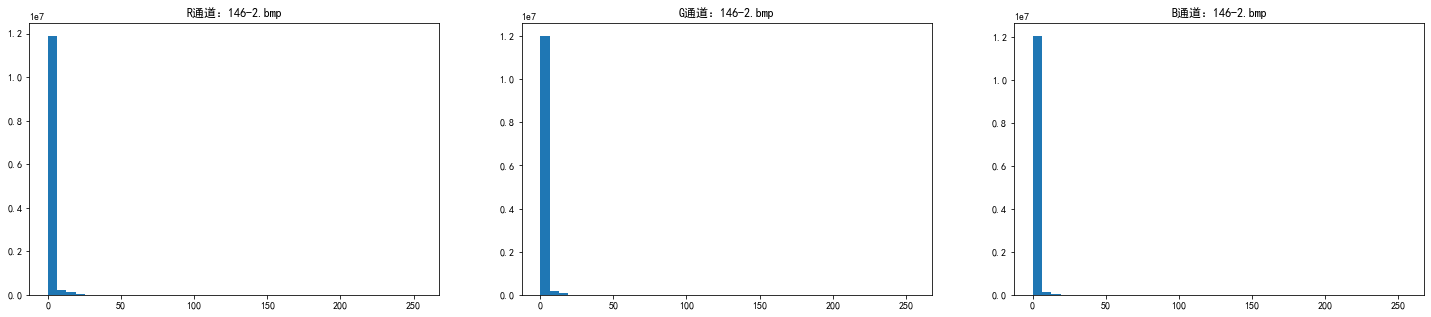

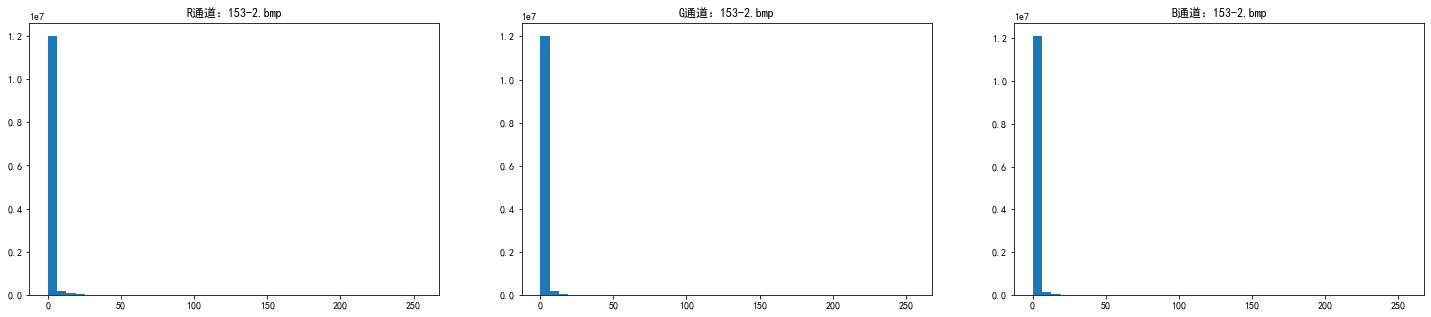

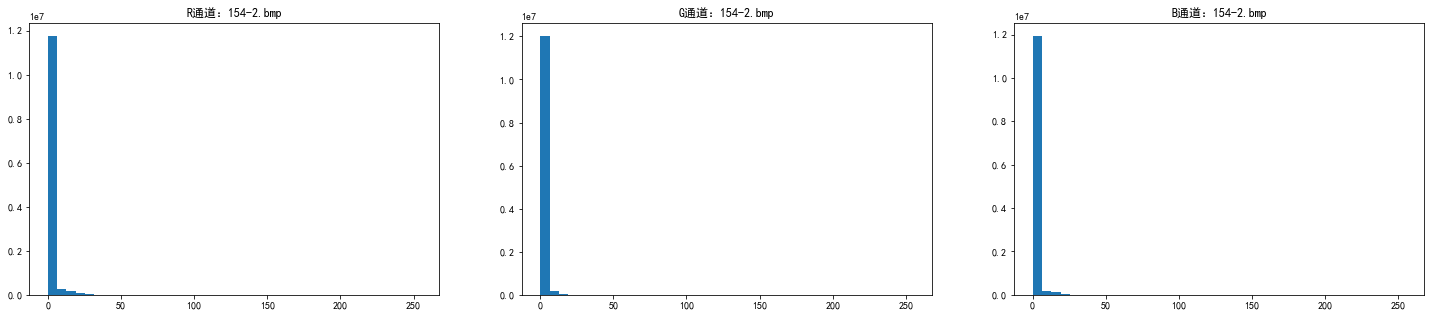

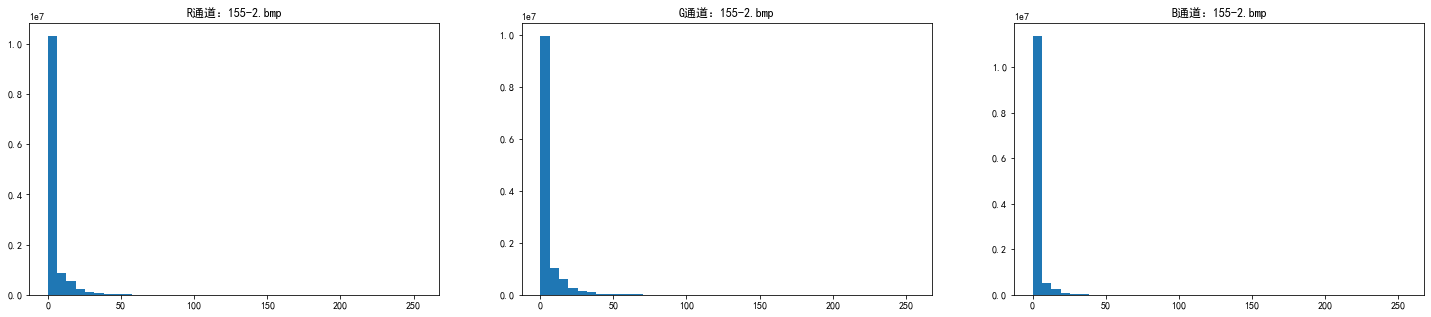

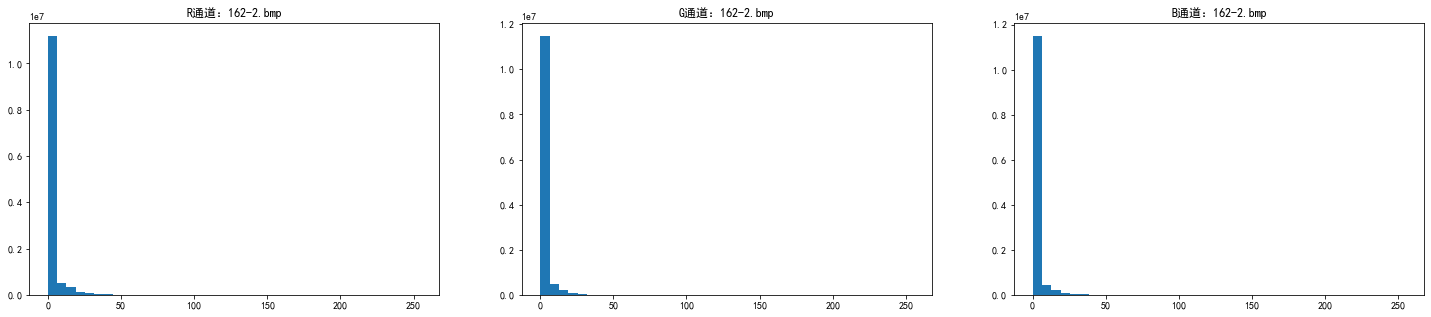

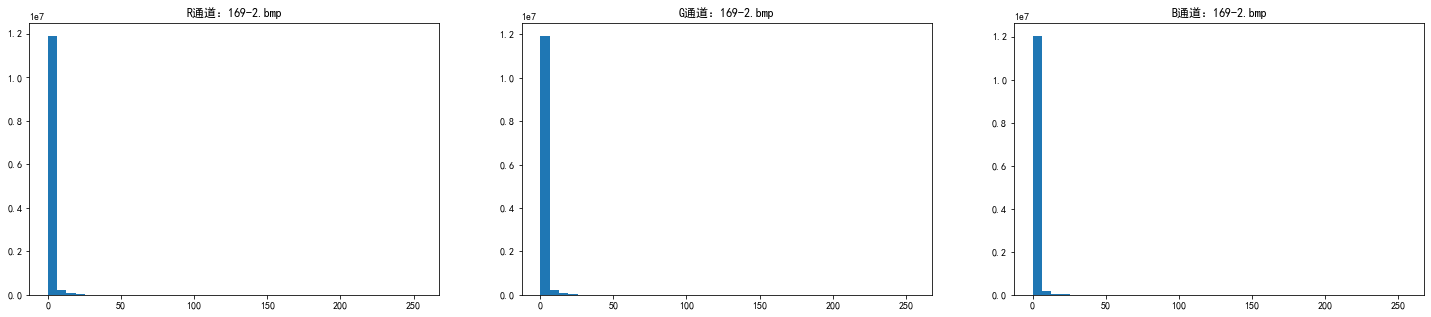

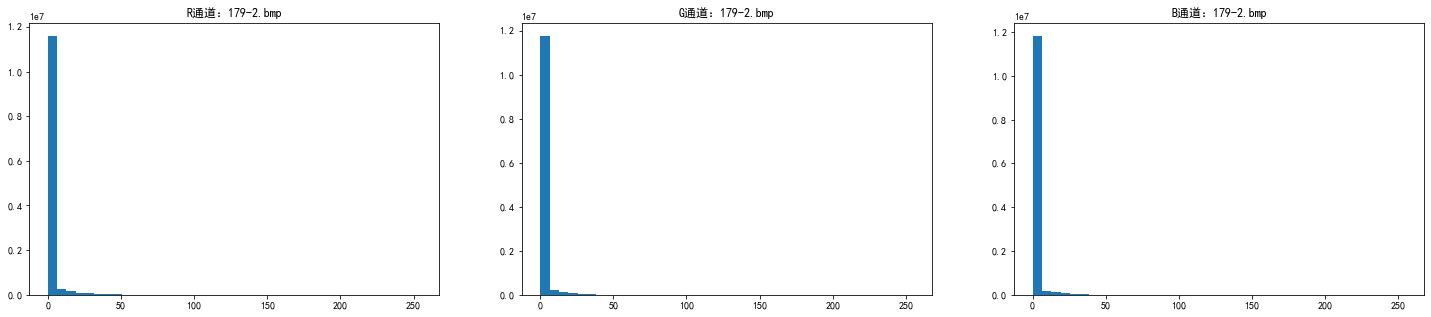

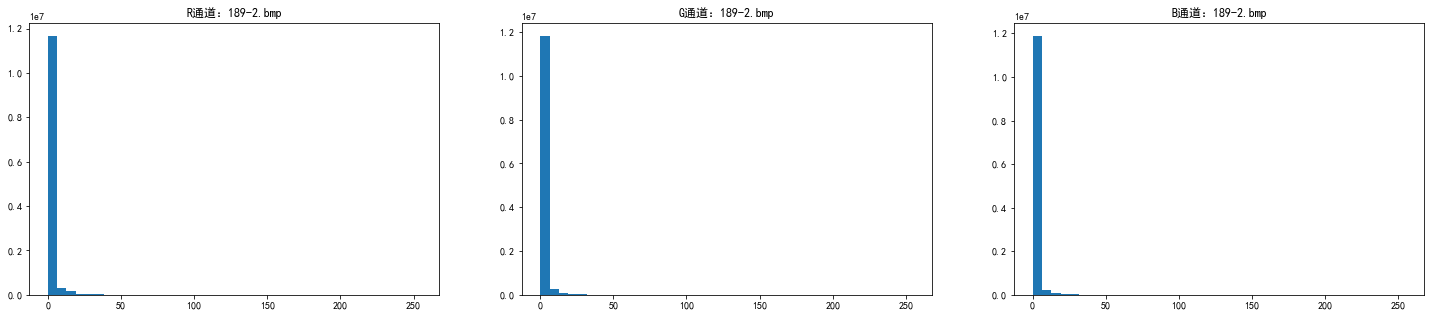

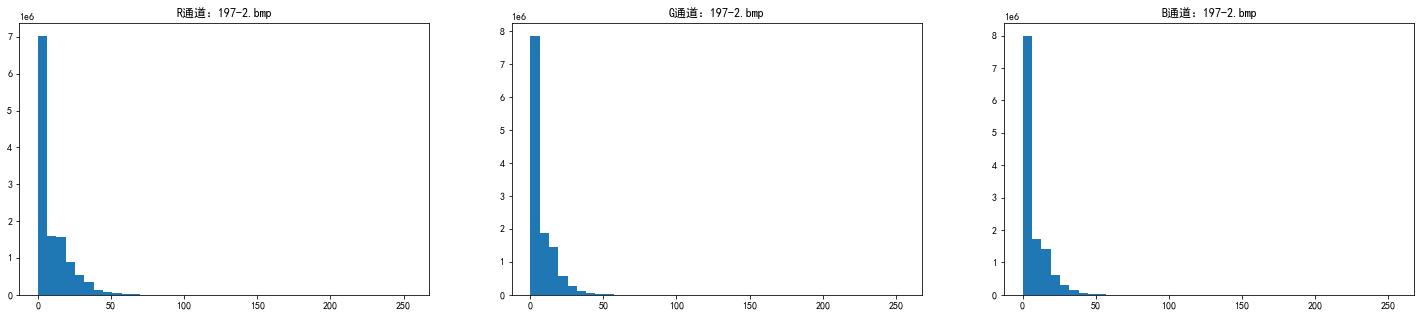

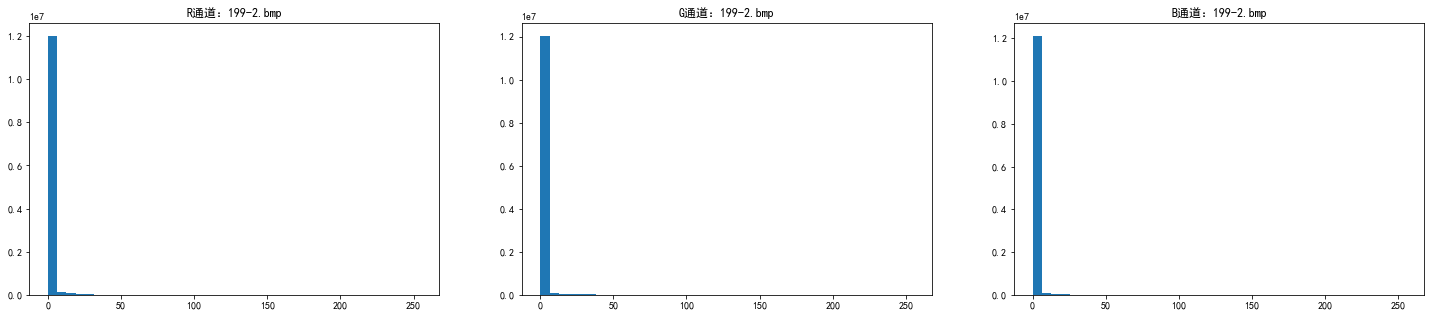

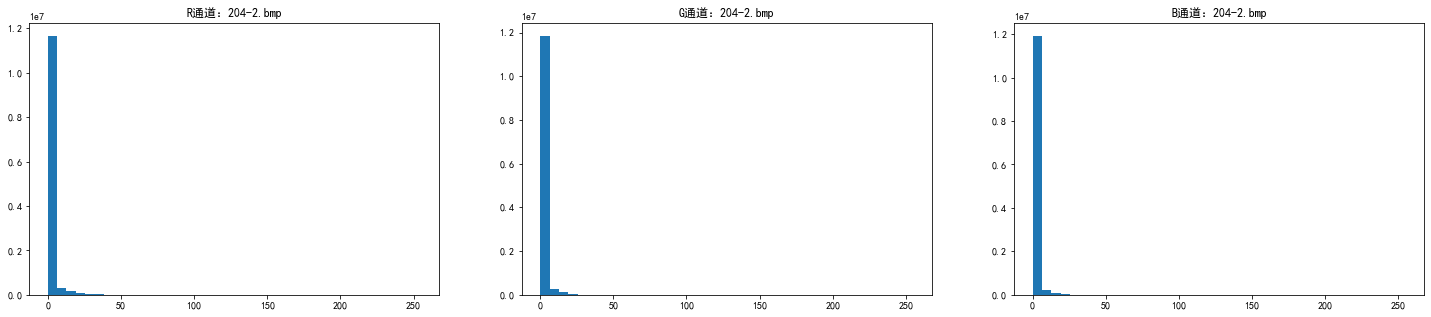

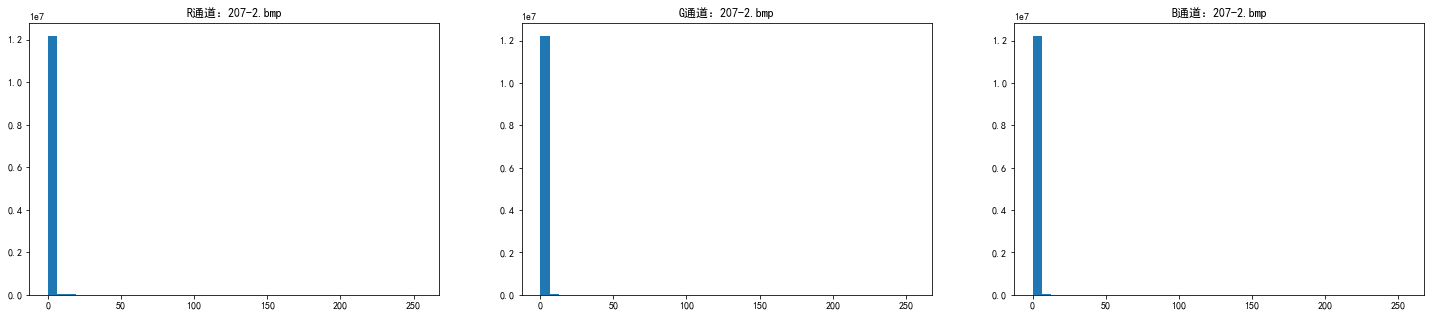

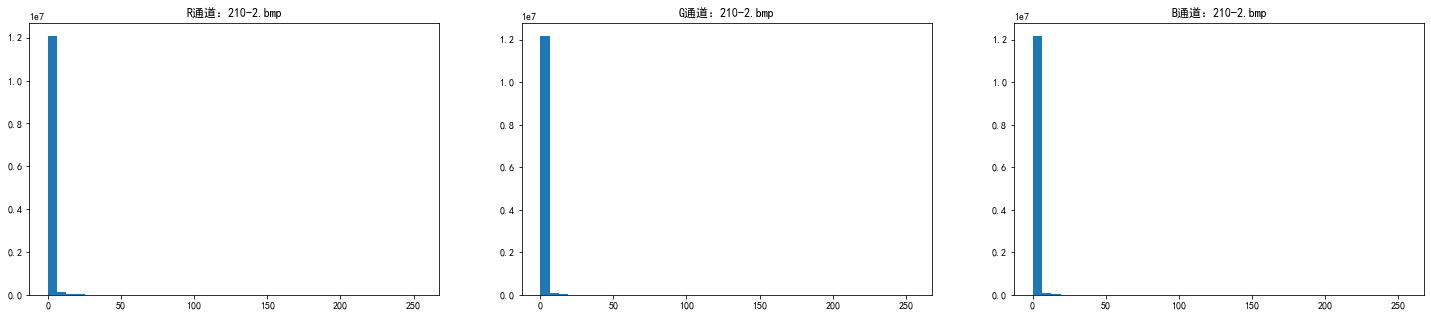

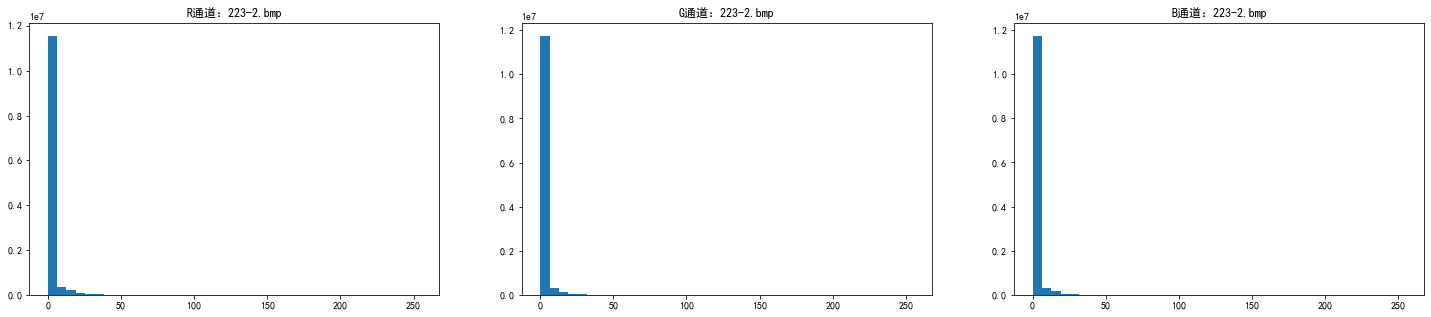

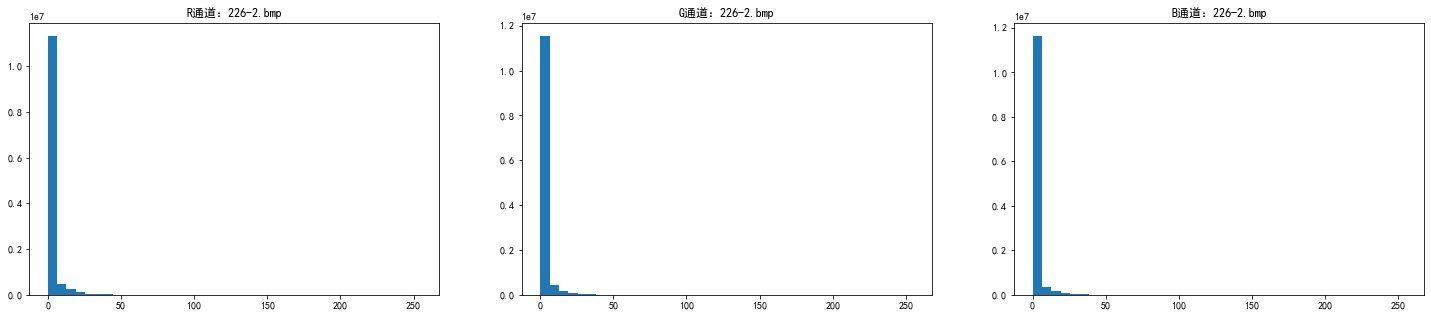

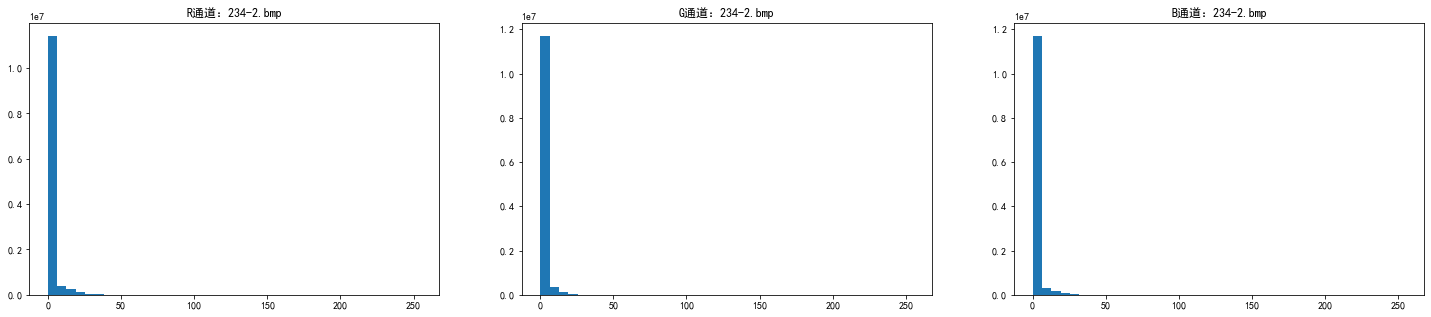

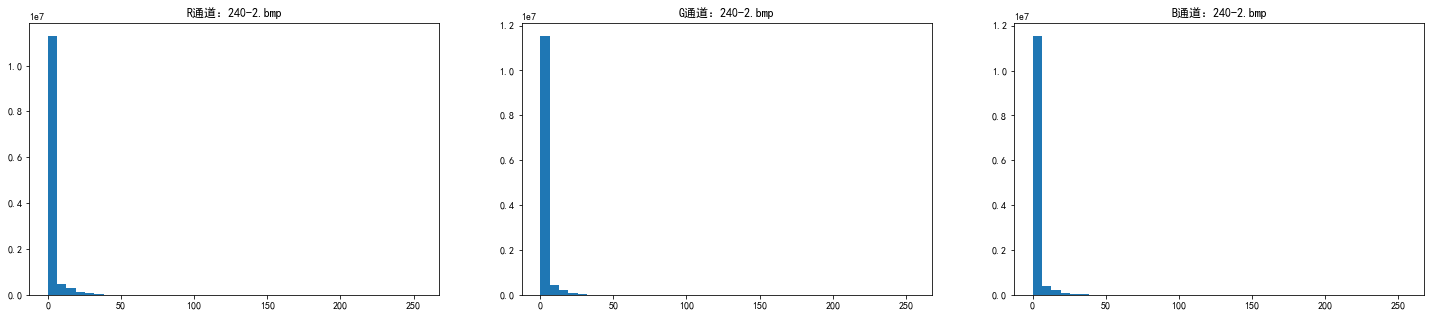

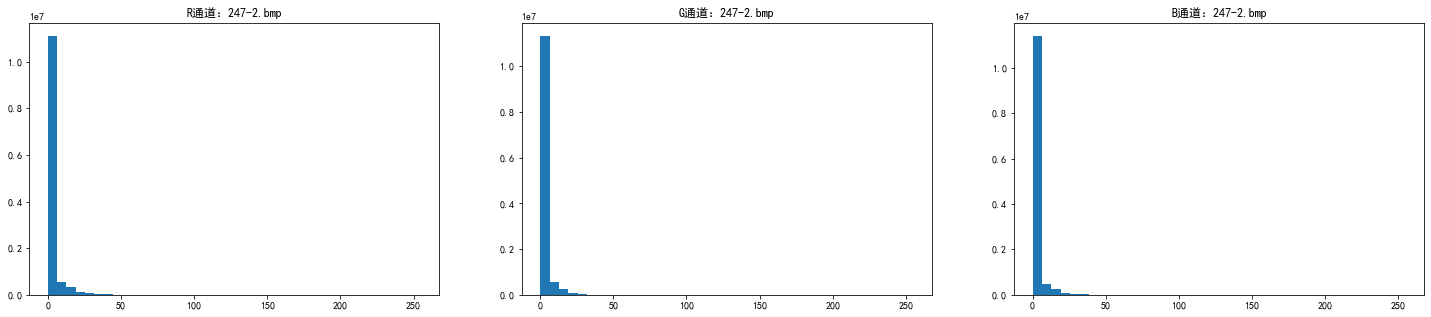

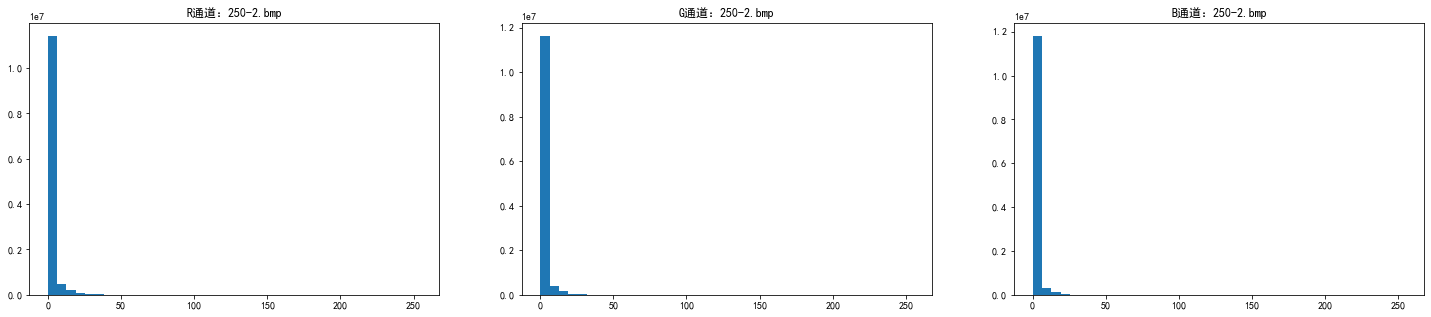

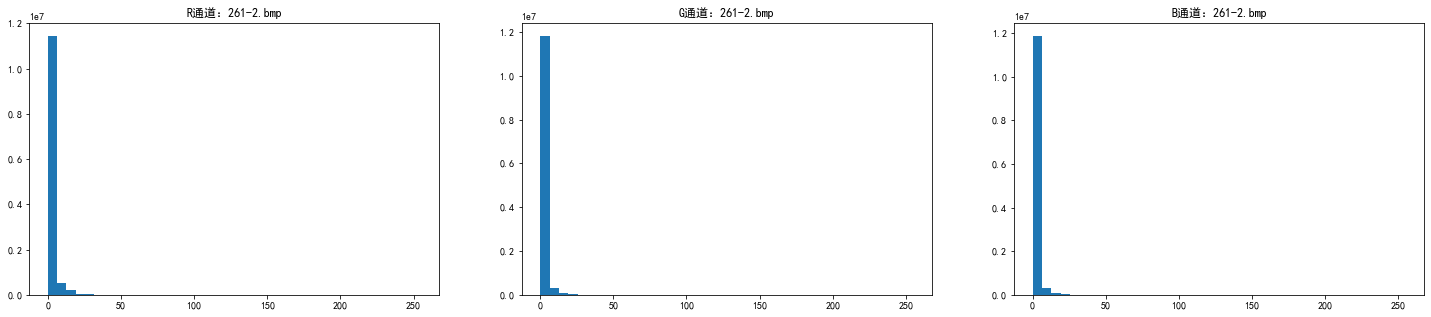

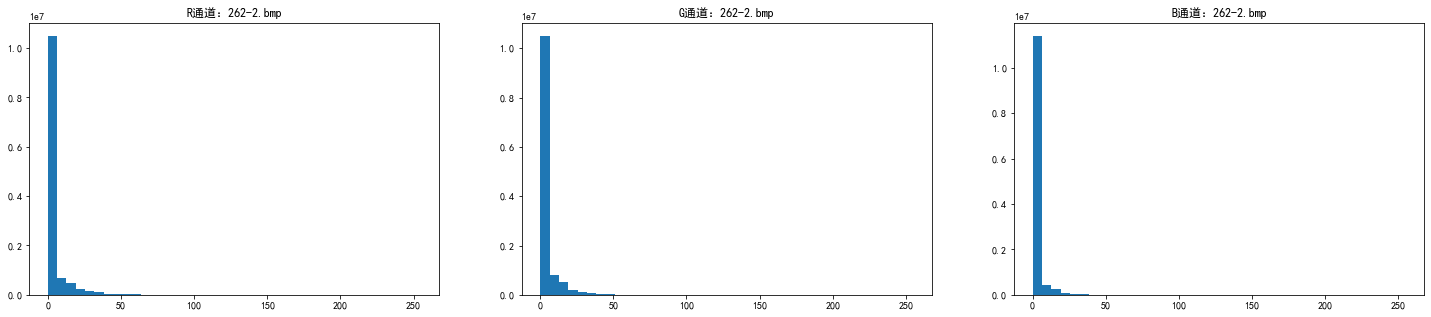

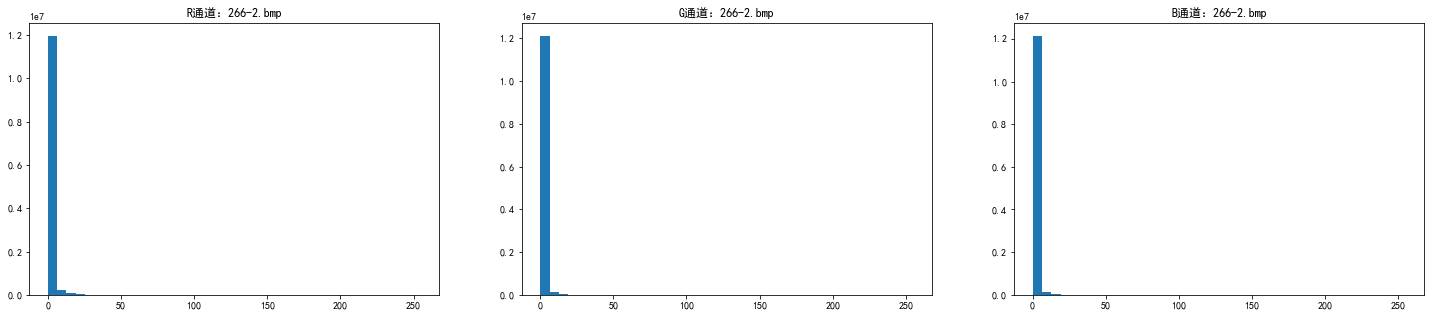

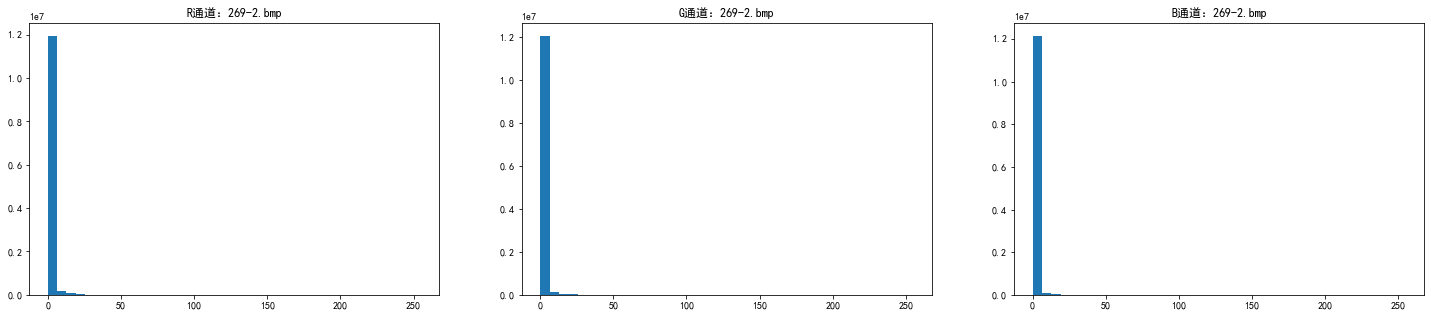

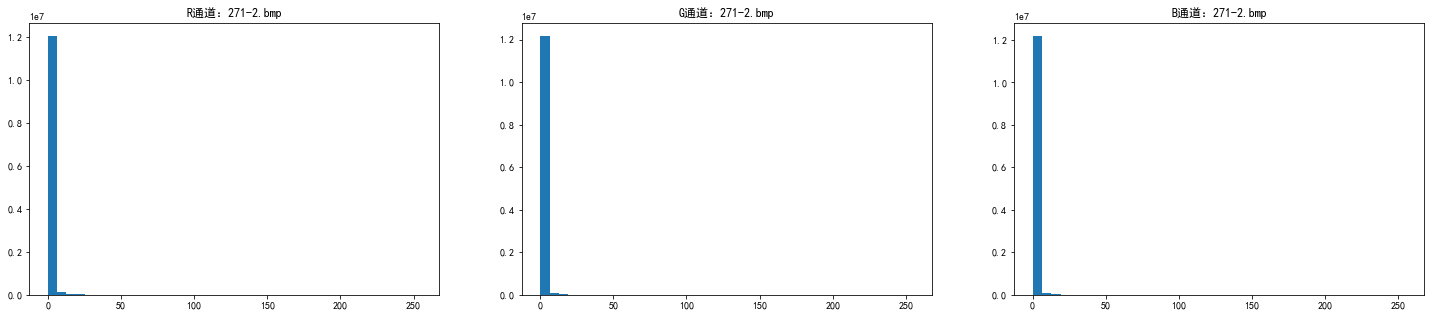

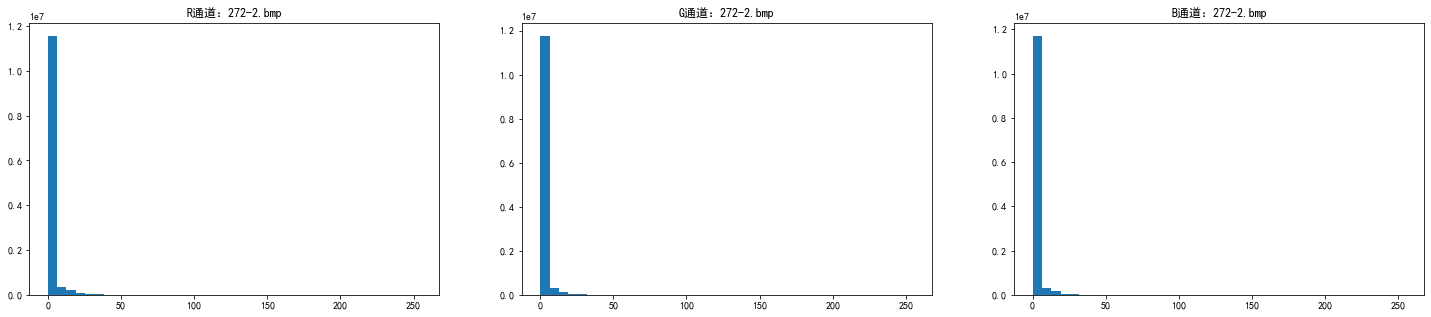

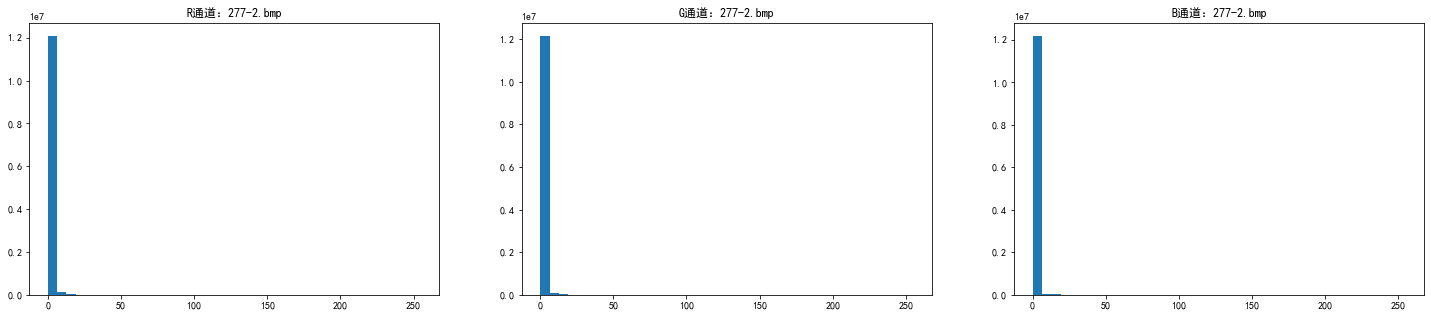

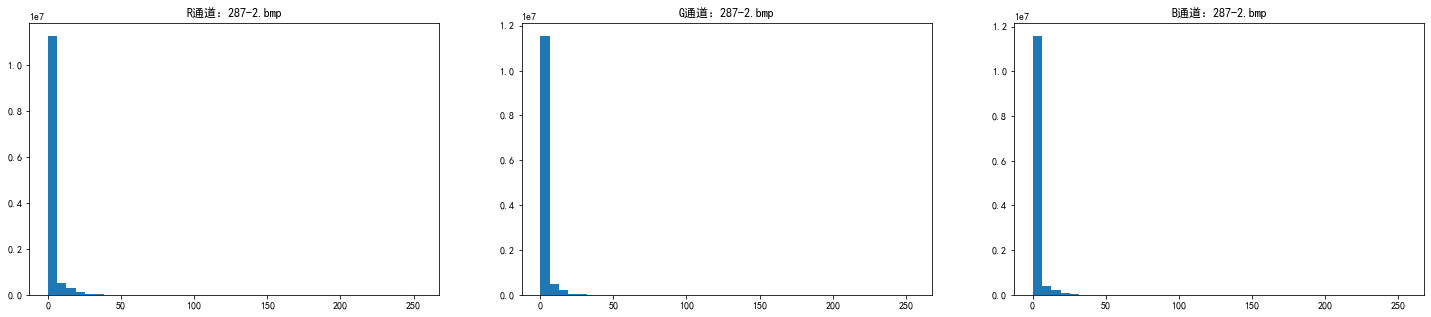

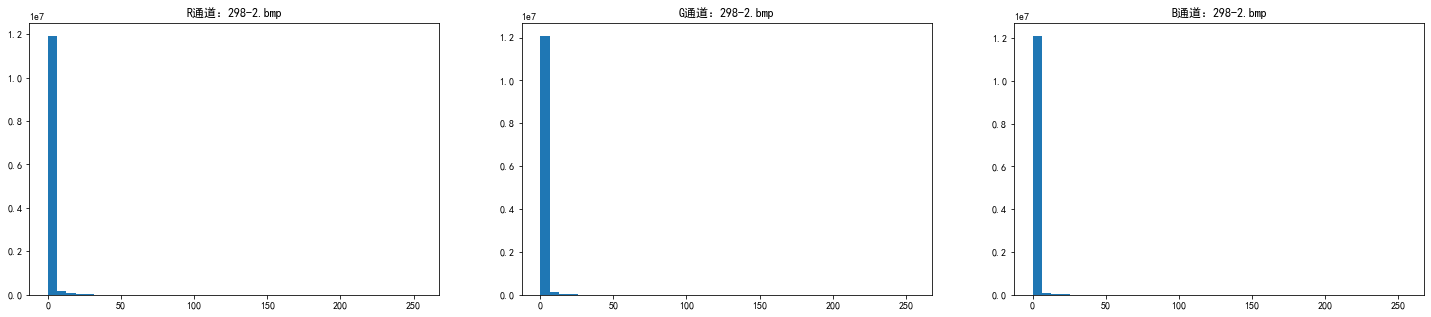

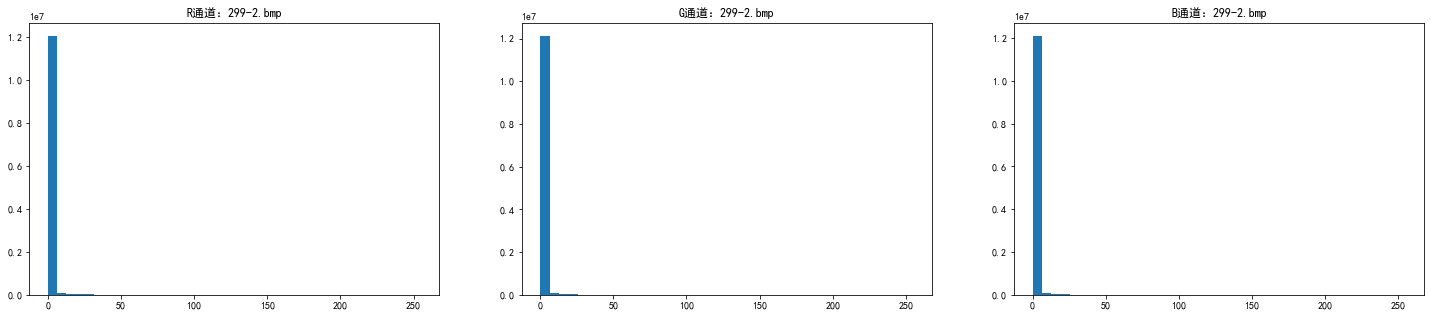

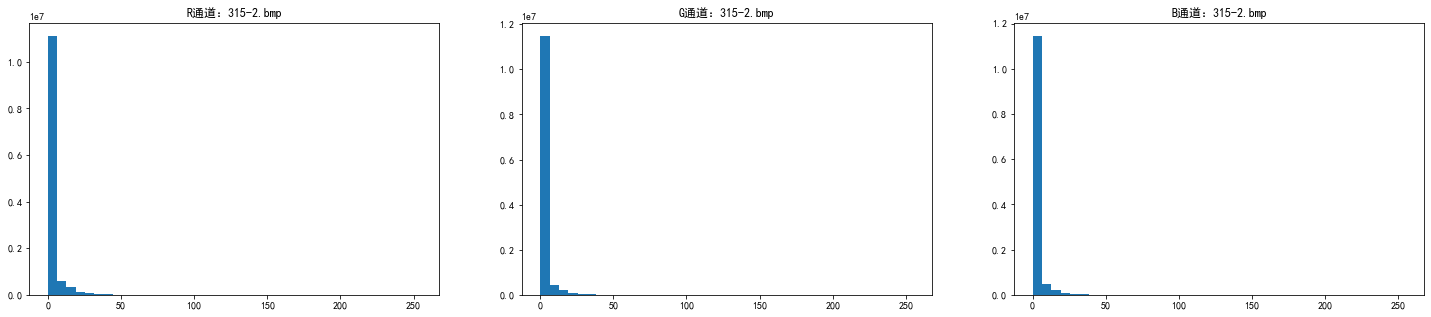

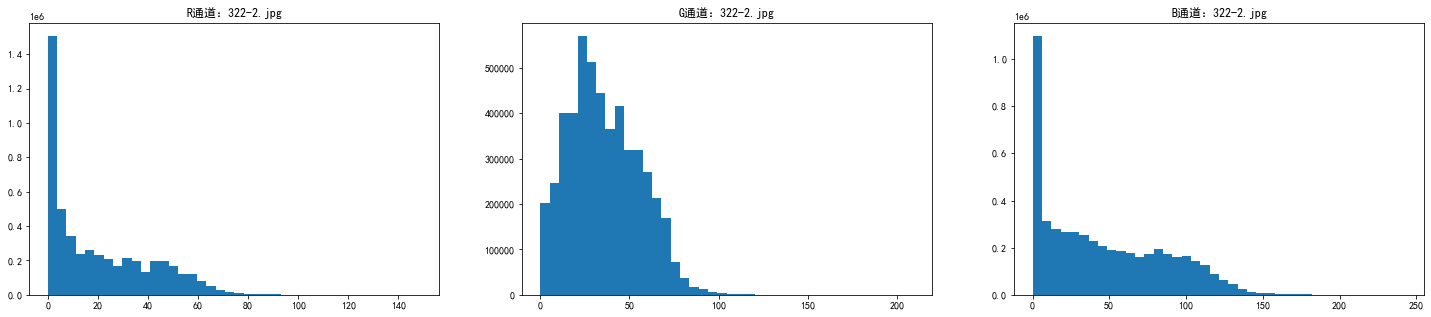

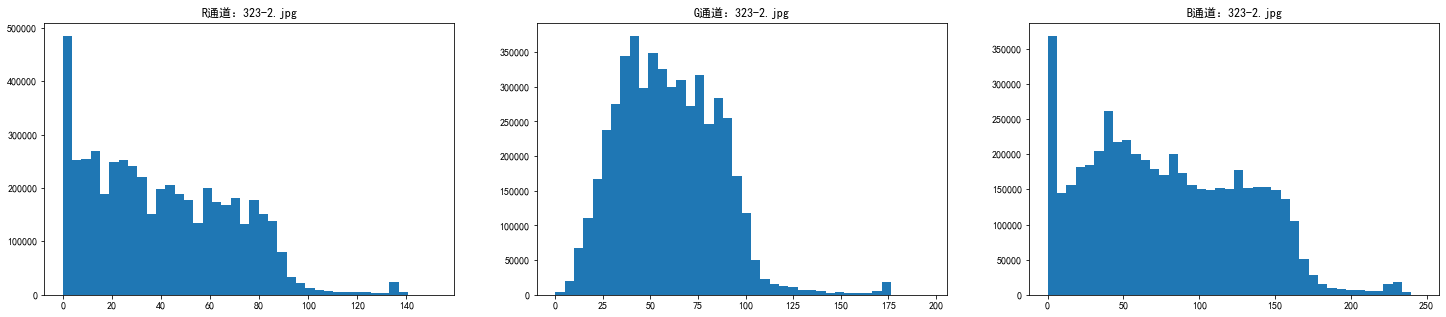

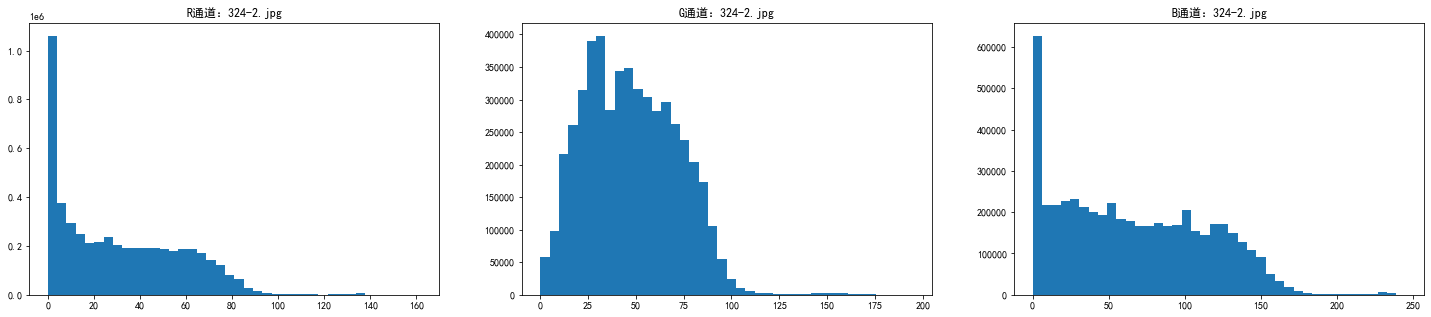

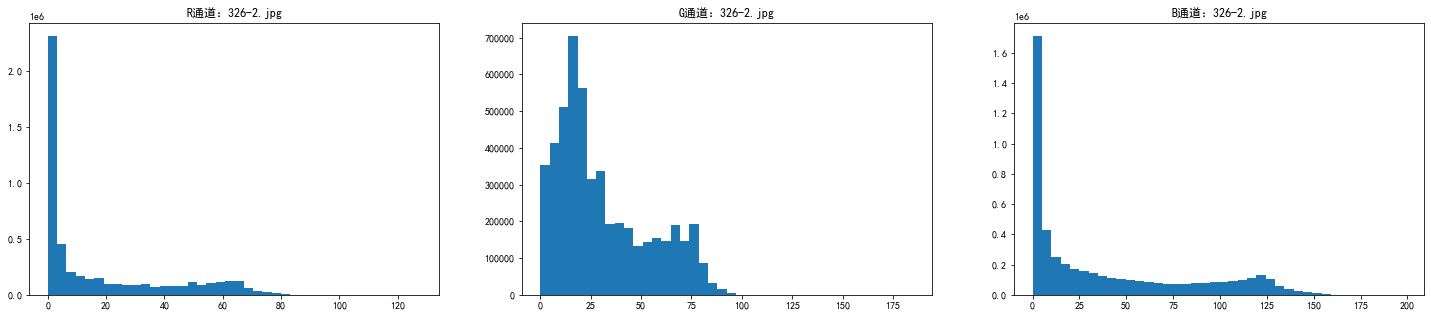

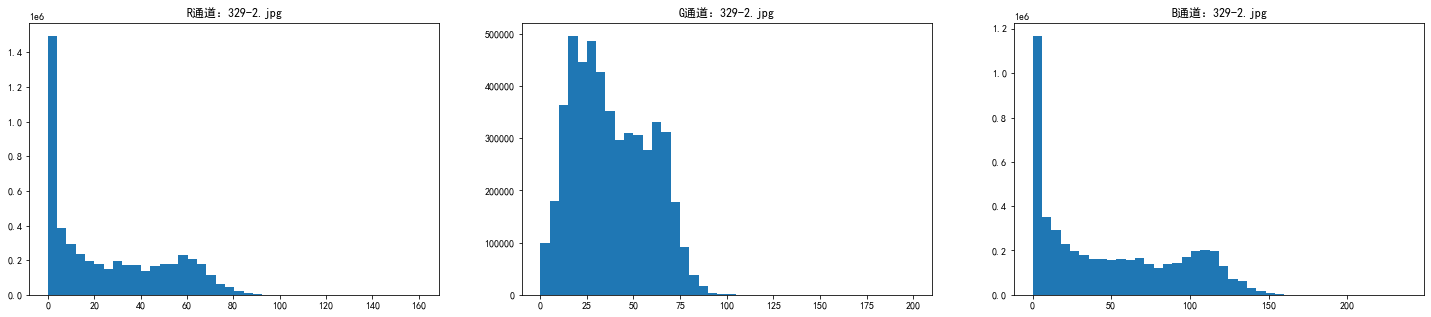

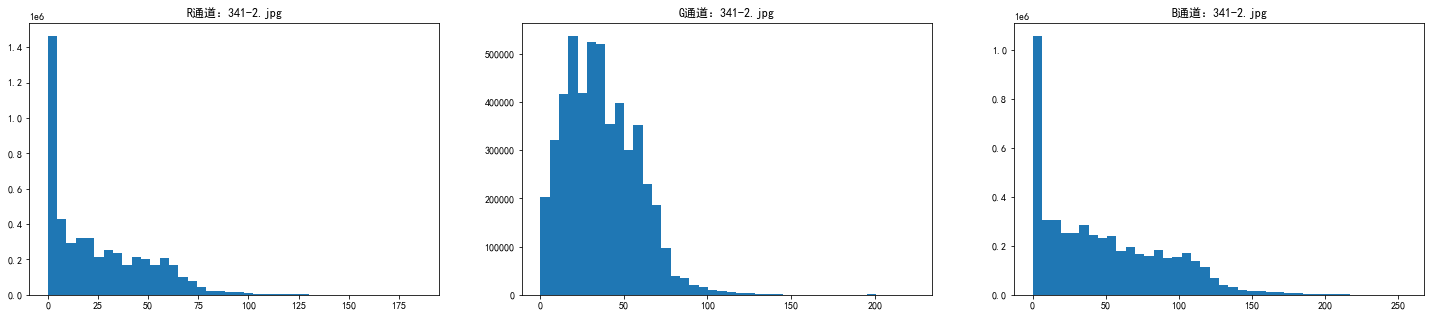

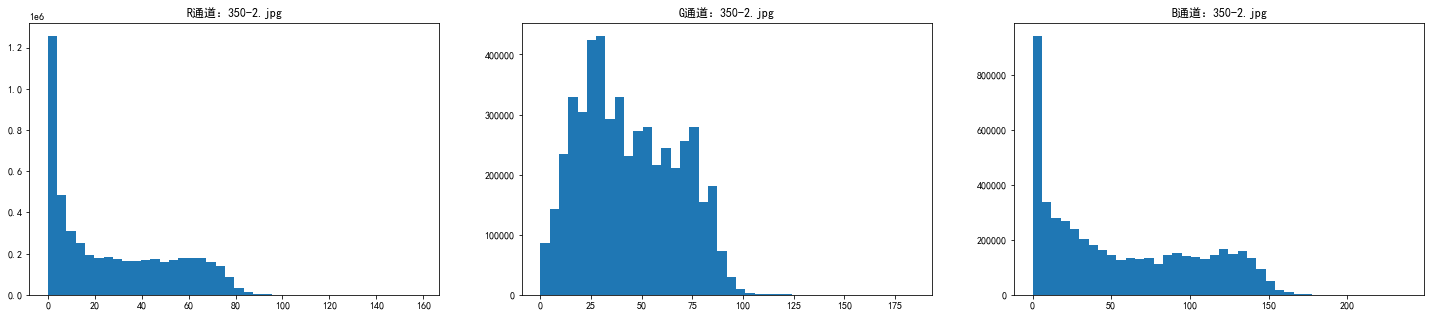

In [3]:
for i in range(len(img_names)):
    
    imgs = os.path.join(root_2,img_names[i])
    img = cv2.imread('./'+imgs )
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    R, G, B = [img[:,:,i] for i in range(img.shape[2])]
    R_flatten = R.ravel()
    G_flatten = G.ravel()
    B_flatten = B.ravel()
    
    fig = plt.figure(figsize=(25,5)) 
    plt.subplot(131)
    plt.hist(R_flatten,40)#划分成30个小区间划直方图，如果不指定区间数量，则默认为10
    plt.title("R通道：" + img_names[i])

    plt.subplot(132)
    plt.hist(G_flatten,40)
    plt.title("G通道：" + img_names[i])

    plt.subplot(133)
    plt.hist(B_flatten,40)
    plt.title("B通道：" + img_names[i])
    plt.show()


In [4]:
img = cv2.imread('train_2(sample)/4-2.bmp')
                        

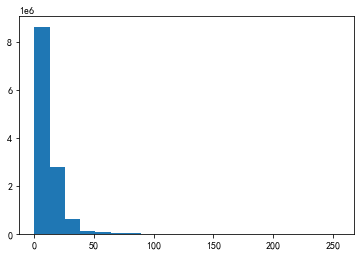

In [5]:
b, g, r = [img[:,:,i] for i in range(img.shape[2])]
plt.hist(g.ravel(),20)
plt.show()

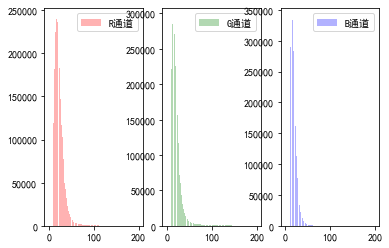

In [11]:
black_threshold = 10  #猜的
r_color = r[np.where((r >= black_threshold) & (g >= black_threshold) & (b >= black_threshold))]
g_color = g[np.where((r >= black_threshold) & (g >= black_threshold) & (b >= black_threshold))]
b_color = b[np.where((r >= black_threshold) & (g >= black_threshold) & (b >= black_threshold))]

bins_color = np.arange(200)
plt.subplot(131)
plt.hist(r_color, bins_color, color = 'r', label = 'R通道', alpha = 0.3)
plt.legend()
plt.subplot(132)
plt.hist(g_color, bins_color, color = 'g', label = 'G通道', alpha = 0.3)
plt.legend()
plt.subplot(133)
plt.hist(b_color, bins_color, color = 'b', label = 'B通道', alpha = 0.3)
plt.legend()
plt.show()

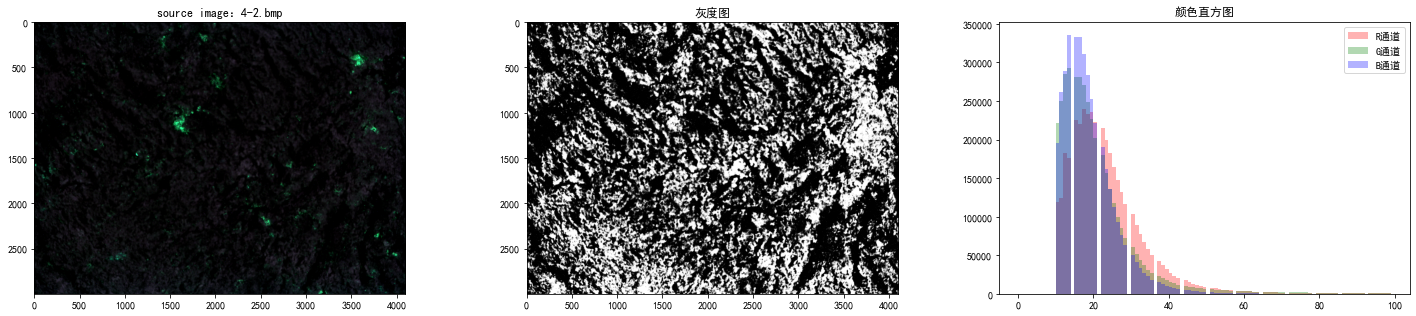

In [9]:
lower_range, upper_range = np.array([[black_threshold, black_threshold, black_threshold], [255, 255, 255]])
mask = cv2.inRange(img, lower_range, upper_range)

# 练习，三种写法效果一样
r_masked = r[mask.astype(np.bool)]
g_masked = g[np.array(mask, dtype = 'bool')]
b_masked = b[np.array(mask, dtype = np.bool)]

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(25,5)) 

plt.subplot(131)
plt.imshow(img)
plt.title("source image：4-2.bmp")

plt.subplot(132)
plt.imshow(mask, cmap = 'gray')
plt.title("灰度图")

plt.subplot(133)
bins_color = np.arange(100)
plt.hist(r_masked, bins_color, color = 'r', label = 'R通道', alpha = 0.3)
plt.hist(g_masked, bins_color, color = 'g', label = 'G通道', alpha = 0.3)
plt.hist(b_masked, bins_color, color = 'b', label = 'B通道', alpha = 0.3)
plt.title("颜色直方图")
plt.legend()
plt.show()

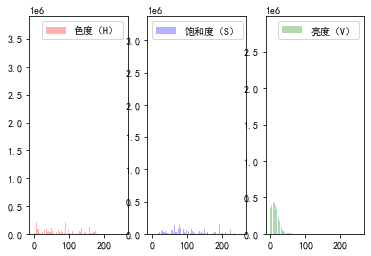

In [13]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = [hsv[:,:,i] for i in range(3)]

bins = np.arange(255)
plt.subplot(131)
plt.hist(h.ravel(), bins, color = 'r',label = '色度（H）', alpha = 0.3)
plt.legend()
plt.subplot(132)
plt.hist(s.ravel(), bins,color = 'b', label = '饱和度（S）', alpha = 0.3)
plt.legend()
plt.subplot(133)
plt.hist(v.ravel(), bins,color = 'g', label = '亮度（V）', alpha = 0.3)
plt.legend()
plt.show()